# PROJECT -4 TOPIC MODELING

In [65]:
from urllib import request
from urllib.request import urlopen
import nltk
from nltk import pos_tag, word_tokenize
import pandas as pd
import glob
import os
from collections import defaultdict
from collections import Counter
import re
import numpy as np
import string
from unidecode import unidecode
import pprint
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.preprocessing import normalize
from stop_words import get_stop_words
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings

warnings.filterwarnings("ignore", category = DeprecationWarning)

## text data

#### pre-processed ten-book-bundle with chapters 

In [2]:
clean_ten = pd.read_csv('data/clean_ten_books.csv',index_col = [0])

In [3]:
# Not split into chapters
df_all = pd.read_csv('data/clean_all_texts.csv',index_col = [0])
df_all.head(2)

,book,text
0,book_1,I The Arrest of Arsène Lupin It was strange en...
1,book_2,CHAPTER I LOTTERY TICKET NO On the eighth day ...


In [4]:
clean_book_1 = pd.read_csv('data/clean_book_1.csv',index_col = [0])
clean_book_2 = pd.read_csv('data/clean_book_2.csv',index_col = [0])
clean_book_3 = pd.read_csv('data/clean_book_3.csv',index_col = [0])
clean_book_4 = pd.read_csv('data/clean_book_4.csv',index_col = [0])
clean_book_6 = pd.read_csv('data/clean_book_6.csv',index_col = [0])
clean_book_7 = pd.read_csv('data/clean_book_7.csv',index_col = [0])
clean_book_10 = pd.read_csv('data/clean_book_10.csv',index_col = [0])
clean_book_11 = pd.read_csv('data/clean_book_11.csv',index_col = [0])
clean_book_15 = pd.read_csv('data/clean_book_15.csv',index_col = [0])
clean_book_16 = pd.read_csv('data/clean_book_16.csv',index_col = [0])
clean_book_1.head(2)

,title,chapter,text
0,gentleman_burglar,1,i the arrest of arsene lupin it was a strange ...
1,gentleman_burglar,2,ii arsene lupin in prison there is no tourist ...


#### raw bundle

In [5]:
raw_ten = pd.read_csv('data/raw_ten_books.csv', index_col =[0])

## Extending stop_words

It hasn't been  easy to obtain some 'decent' results from topic modeling. I first tried to extend the built-in english stop-words manually by adding for example, french names and titles, english name, etc. and the results of topic modeling weren't great. Finallay I tried the following method:
* pos-tagging my text
* try to add  a combination of tagged word categories into the stop-words and see the resulted topics.
I'm including here some example of tagged word combinations in  customizing the stop-words.

In [6]:
def tokenize_and_tag(text):
    tokens  = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens    

In [7]:
clean_books = ' '.join(clean_ten.text)
tagged_words = tokenize_and_tag(clean_books)
tagged_words

[('i', 'VB'),
 ('the', 'DT'),
 ('arrest', 'NN'),
 ('of', 'IN'),
 ('arsene', 'NN'),
 ('lupin', 'NN'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('strange', 'JJ'),
 ('ending', 'VBG'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('voyage', 'NN'),
 ('that', 'WDT'),
 ('had', 'VBD'),
 ('commenced', 'VBN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('most', 'RBS'),
 ('auspicious', 'JJ'),
 ('manner', 'NN'),
 ('the', 'DT'),
 ('transatlantic', 'JJ'),
 ('steamship', 'NN'),
 ('la', 'NN'),
 ('provence', 'NN'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('swift', 'NN'),
 ('and', 'CC'),
 ('comfortable', 'JJ'),
 ('vessel', 'NN'),
 ('under', 'IN'),
 ('the', 'DT'),
 ('command', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('most', 'RBS'),
 ('affable', 'JJ'),
 ('man', 'NN'),
 ('the', 'DT'),
 ('passengers', 'NNS'),
 ('constituted', 'VBD'),
 ('a', 'DT'),
 ('select', 'NN'),
 ('and', 'CC'),
 ('delightful', 'JJ'),
 ('society', 'NN'),
 ('the', 'DT'),
 ('charm', 'NN'),
 ('of', 'IN'),
 ('new', 'JJ'),
 ('acquaintances', 'NNS'),
 ('and', 'CC'),
 ('impr

In [8]:
#clean_books

In [9]:
tagged_words[0][0]

'i'

In [10]:
tagged_words[0][1]

'VB'

In [11]:
stops = [[k[0] for k in j if  k[1] ==('NNP')] for j in [tagged_words]]

In [12]:
cat = ['NNP','DT', 'RB', 'IN']

In [13]:
stops_1 = [[k[0] for k in j if  k[1]  in (cat)] for j in [tagged_words]]

In [14]:
to_keep = ['NN','NNS', 'NNP']

In [15]:
stops_2 = [[k[0] for k in j if (k[1] not in (to_keep))] for j in [tagged_words]]

In [16]:
stops_3 = [[k[0] for k in j if (k[1] != ('NN') and k[1] != ('NNS'))] for j in [tagged_words]]

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [18]:
for x in stops[0]:
    stop_words.append(x)
len(stop_words)  

249

In [19]:
stopwords_1 = stopwords.words('english')
for x in stops_1[0]:
    stopwords_1.append(x)
len(stopwords_1)   

221414

In [20]:
stopwords_2 = stopwords.words('english')
for x in stops_2[0]:
    stopwords_2.append(x)
len(stopwords_2)   

606370

In [21]:
stopwords_3 = stopwords.words('english')
for x in stops_3[0]:
    stopwords_3.append(x)
len(stopwords_3)   

606440

### NMF Topic Modeling

In [32]:
def get_nmf_topics(doc, topic_num, n_top_words, stopwords):
    """
    NMF topic modeling with 
    * doc = a corpus, 
    * topic_num = number of topic, and 
    * n_top_words = number of top words
    """
    vectorizer = CountVectorizer(analyzer = 'word',
                                 #min_df = 0.01,
                                 #max_df = 0.95,
                                 stop_words = stopwords,
                                 lowercase = True)
    vectorizer.fit(doc)
    # vect_doc is a document-term matrix
    vect_doc = vectorizer.transform(doc)
    print(f"Vectorized text shape: {vect_doc.shape}",'\n')
    nmf_model = NMF(topic_num)
    # vect_topic is a topic-term matrix
    vect_topic = nmf_model.fit_transform(vect_doc)
    topic_word = nmf_model.components_
    # feat_names are words making the topic
    feat_names = vectorizer.get_feature_names()
    word_dict = {}
    for i in range(topic_num):
        words_id = nmf_model.components_[i].argsort()[:-n_top_words-1:-1]
        words = [feat_names[key] for key in words_id]
        word_dict['Topic No. ' + '{:02d}'.format(i+1)]=words
        topic_df = pd.DataFrame(word_dict)
    print("Topic dataframe: ",'\n')
    print(topic_df,'\n')
    
    for idx, topic in enumerate(nmf_model.components_):
        print('\n')
        print("Topic-term matrix - Topic %d :" %(idx+1),'\n')
        print([(feat_names[i], round(topic[i],3))
              for i in topic.argsort()[:-n_top_words -1:-1]],'\n')

#### using  stop_words english + NNP: 

In [34]:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stop_words
get_nmf_topics(doc, topic_num, n_top_words, stopwords)

Vectorized text shape: (128, 19856) 

Topic dataframe:  

   Topic No. 01 Topic No. 02 Topic No. 03 Topic No. 04 Topic No. 05  \
0           one        lupin       shears        lupin      patrice   
1          said     daubrecq        lupin      sholmes      coralie   
2            nt          one          one       arsene       simeon   
3           man         said          two     ganimard          one   
4           two        would         said         said           nt   
5           yes          yes     ganimard          one         said   
6          know          two       wilson     monsieur      essares   
7            de          man           nt          two          man   
8        little      gilbert       arsene       wilson         luis   
9         would         know        would        house      captain   
10         come    prasville      project        would         know   
11          old         time          yes          man          yes   
12         time    

The topics above are very similar to each other..few words diffenciating words such as death, godstone, emperror, chateau, gallery, money...

#### Using stop_words  english + NNP , DT, RB, IN tagged words  :

In [35]:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stopwords_1
get_nmf_topics(doc, topic_num, n_top_words, stopwords)

Vectorized text shape: (128, 18262) 

Topic dataframe:  

   Topic No. 01 Topic No. 02 Topic No. 03 Topic No. 04 Topic No. 05  \
0           one       shears      gerbois   kesselbach       simeon   
1          said          one          mon          one          man   
2           two          two          one         said         said   
3         would         said        would          man          one   
4           man        would          man      sernine          old   
5          know      project       ticket          two         know   
6          time          man         time         know        shall   
7           see        shall         said        shall        would   
8         could         know         desk        chief         gold   
9          must         must          two       gourel         must   
10         hand          see        house         went         time   
11      nothing         time      detinan         door        asked   
12        shall    

The resulted topics above are still similar to each other.

#### Using stop-words english + all words except NN, NNS and NNP tagged words

In [36]:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stopwords_2
get_nmf_topics(doc, topic_num, n_top_words, stopwords)

Vectorized text shape: (128, 8029) 

Topic dataframe:  

   Topic No. 01 Topic No. 02 Topic No. 03 Topic No. 04 Topic No. 05  \
0           man          man        house         time      letters   
1          hand         lamp         room         hand      emperor   
2          life         time       letter        woman         room   
3          time        house         time      nothing          man   
4       nothing      nothing          day          way         time   
5        moment      letters      nothing       moment        night   
6          room        words         case        death      nothing   
7         voice         word       francs        words         hand   
8          word          way       moment          day       papers   
9         death      morning          man       island       moment   
10          way         hand         fact        voice          day   
11      minutes       moment          way          men         book   
12      morning     

/Users/carlamoestafa/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Still not great topics although we get more differentiating words such as policemen, godstone, restaurant, etc..

#### Using stop-words english + all words except NN, NNS  tagged words

In [37]:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stopwords_3
get_nmf_topics(doc, topic_num, n_top_words, stopwords)

Vectorized text shape: (128, 8025) 

Topic dataframe:  

   Topic No. 01 Topic No. 02 Topic No. 03 Topic No. 04 Topic No. 05  \
0           man          man        house         time      letters   
1          hand         lamp         room         hand      emperor   
2          life         time       letter        woman         room   
3          time        house         time      nothing          man   
4       nothing      nothing          day          way         time   
5        moment      letters      nothing       moment        night   
6          room        words         case        death      nothing   
7         voice         word       francs        words         hand   
8          word          way       moment          day       papers   
9         death      morning          man       island       moment   
10          way         hand         fact        voice          day   
11      minutes       moment          way          men         book   
12      morning     

/Users/carlamoestafa/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Keeping only NN and NNS in the text results in similar topics than having NN, NNS and NNP above. 

### Tfidftransformer  & NMF Topic Modeling

In [46]:
clean_text = pd.read_csv('data/clean_ten_books.csv',index_col = [0])

In [47]:
len(clean_text)

128

In [48]:
def get_tfidf_nmf_topics(doc,topic_num,n_top_words, stopwords):
    vectorizer = CountVectorizer(analyzer = 'word',
                             #min_df = 0.05,
                             #max_df = 0.95,
                             stop_words = stopwords,
                             lowercase = True)
    vect_doc = vectorizer.fit_transform(doc)
    print(f"Vectorized text shape: {vect_doc.shape}",'\n')
    transformer = TfidfTransformer(smooth_idf = False)
    x_tfidf = transformer.fit_transform(vect_doc)
    xtfidf_norm = normalize(x_tfidf, norm = 'l1', axis = 1)
    nmf_model = NMF(n_components = topic_num, init = 'nndsvd')
    
    vect_topic = nmf_model.fit(xtfidf_norm)
    nmf_weights = nmf_model.components_
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {}
    for i in range(topic_num):
        words_id = nmf_weights[i].argsort()[:-n_top_words-1:-1]
        words = [feat_names[key] for key in words_id]
        word_dict['Topic No. ' + '{:02d}'.format(i+1)] = words
        topic_df = pd.DataFrame(word_dict)
    print("Topic dataframe: ",'\n')
    print(topic_df,'\n')
    
    for idx, topic in enumerate(nmf_model.components_):
        print('\n')
        print("Topic-term matrix - Topic %d :" %(idx+1),'\n')
        print([(feat_names[i], round(topic[i],3))
              for i in topic.argsort()[:-n_top_words -1:-1]],'\n')
    return (vect_topic, nmf_weights,feat_names, topic_df, nmf_model.components_)

In [72]:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stop_words
get_tfidf_nmf_topics(doc, topic_num, n_top_words, stopwords)

Vectorized text shape: (128, 19856) 



Topic-term matrix - Topic 1 : 

[('sholmes', 0.269), ('wilson', 0.145), ('lupin', 0.107), ('ganimard', 0.082), ('destange', 0.057), ('shears', 0.057), ('arsene', 0.054), ('herlock', 0.051), ('monsieur', 0.048), ('said', 0.04), ('one', 0.038), ('baron', 0.034), ('englishman', 0.033), ('house', 0.033), ('clotilde', 0.031), ('bresson', 0.03), ('blonde', 0.03), ('diamond', 0.028), ('mon', 0.028), ('dimblevalle', 0.027)] 



Topic-term matrix - Topic 2 : 

[('patrice', 0.219), ('coralie', 0.18), ('simeon', 0.125), ('essares', 0.101), ('luis', 0.068), ('yabon', 0.054), ('nt', 0.046), ('one', 0.043), ('said', 0.039), ('captain', 0.039), ('belval', 0.037), ('man', 0.03), ('know', 0.025), ('yes', 0.023), ('bournef', 0.023), ('two', 0.023), ('bey', 0.023), ('lodge', 0.021), ('old', 0.02), ('diodokis', 0.019)] 



Topic-term matrix - Topic 3 : 

[('veronique', 0.219), ('francois', 0.133), ('honorine', 0.101), ('stephane', 0.094), ('maguennoc', 0.051), ('nt'

(<128x19856 sparse matrix of type '<class 'numpy.float64'>'
 	with 171346 stored elements in Compressed Sparse Row format>,
 array([[1.50220869e-04, 1.09195390e-03, 7.63193942e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.31571428e-04, 1.12035720e-03, 4.22631997e-04, ...,
         3.11302072e-04, 3.11302072e-04, 0.00000000e+00],
        [1.02149319e-03, 1.49687911e-03, 1.95319241e-03, ...,
         2.50303014e-05, 2.50303014e-05, 0.00000000e+00],
        [8.26568157e-04, 1.06744152e-03, 5.28421629e-04, ...,
         0.00000000e+00, 0.00000000e+00, 1.08534710e-05],
        [7.58948313e-04, 1.40450456e-03, 1.60765607e-03, ...,
         9.92222132e-05, 9.92222132e-05, 0.00000000e+00],
        [1.48270591e-03, 5.71039348e-04, 1.48466423e-03, ...,
         1.30553296e-04, 1.30553296e-04, 1.21576754e-03]]),
 ['aback',
  'abandon',
  'abandoned',
  'abandoning',
  'abashed',
  'abbe',
  'abbey',
  'abbots',
  'abbreviation',
  'abdicate',
  'abduct',
  'abduct

In [50]:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stopwords_1
get_tfidf_nmf_topics(doc, topic_num, n_top_words, stopwords)

Vectorized text shape: (128, 18262) 

Topic dataframe:  

   Topic No. 01 Topic No. 02 Topic No. 03   Topic No. 04 Topic No. 05  \
0           one       simeon     honorine     kesselbach       shears   
1          said          one       island         gourel     destange   
2           two         said        sarek        sernine          one   
3         would          man         mame            one     clotilde   
4           man        lodge     correjou          chief     holmlock   
5       gilbert         know       breton         pierre   englishman   
6          know          old          son           said         said   
7          time         gold          one            man          two   
8          must          two          two            two         lady   
9         could           us         said           know      bresson   
10           us        shall         boat        dolores        house   
11      marquis         time        women       malreich  dimbleva

(NMF(init='nndsvd', n_components=6),
 array([[3.14619088e-03, 3.22072902e-03, 8.91164662e-04, ...,
         5.20250225e-04, 5.20250225e-04, 9.35786483e-04],
        [1.81116144e-03, 9.69130796e-04, 1.11602509e-03, ...,
         8.18802525e-05, 8.18802525e-05, 0.00000000e+00],
        [8.96606527e-04, 2.38247663e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.66621884e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.33114307e-03],
        [3.43502875e-05, 0.00000000e+00, 4.34997388e-04, ...,
         6.04817342e-05, 6.04817342e-05, 8.14678245e-05],
        [0.00000000e+00, 1.18314269e-04, 2.74190469e-03, ...,
         1.66160085e-05, 1.66160085e-05, 0.00000000e+00]]),
 ['abandon',
  'abandoned',
  'abandoning',
  'abashed',
  'abbe',
  'abbey',
  'abbots',
  'abbreviation',
  'abdicate',
  'abduct',
  'abducted',
  'abduction',
  'abductions',
  'abed',
  'abel',
  'aberration',
  'abhorrence',
  'abhors'

In [43]:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stopwords_2
lupin_nmf = get_tfidf_nmf_topics(doc, topic_num, n_top_words, stopwords)

Vectorized text shape: (128, 8029) 

Topic dataframe:  

   Topic No. 01 Topic No. 02 Topic No. 03  Topic No. 04 Topic No. 05  \
0           man       island     hillocks       emperor     godstone   
1          time        woman      caravan       letters       radium   
2         house         time      chateau           man          man   
3          room         hand          man           car      prophet   
4       nothing        women          men         coins      fairies   
5          hand       tunnel     earrings        papers         robe   
6        moment      nothing         hand          room    centuries   
7           way        death          way   hidingplace         hand   
8           men          way         disc          book        power   
9        letter        voice     children          time      miracle   
10          day       moment         time       nothing      victims   
11         life       bridge      nothing           day       crypts   
12     

Using stop-words that exclude NN and NNS and TfidfTransformer to get the vectorized document to pass to the NMF modeling seemed to provide the 'best' results. Here, my attempt to interpret the different topics:

In [51]:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stopwords_3
lupin_nmf = get_tfidf_nmf_topics(doc, topic_num, n_top_words, stopwords)

Vectorized text shape: (128, 8025) 

Topic dataframe:  

   Topic No. 01 Topic No. 02 Topic No. 03  Topic No. 04 Topic No. 05  \
0           man       island     hillocks       emperor     godstone   
1          time        woman      caravan       letters       radium   
2         house         time      chateau           man          man   
3          room         hand          men         coins      prophet   
4       nothing        women          man           car      fairies   
5          hand       tunnel     earrings        papers         robe   
6        moment      nothing         hand          room    centuries   
7           way        death          way   hidingplace         hand   
8           men          way         disc          book        power   
9        letter        voice     children          time      miracle   
10          day       moment         time       nothing      victims   
11         life       bridge      nothing           day       crypts   
12     

* Topic 1 : death in daily life setting                                           
* Topic 2 : unusual (?) death on an island (monster,island, motorboat...)
* Topic 3 : road trip (caravan, orchard, hillocks, pool),valuable (earrings, medals)
* Topic 4 : nobility, valuable documents, secrecy 
* Topic 5 : special substance (godstone, radium, menhirs, particle), legend/history(prophet, menhir, crypts, centuries) 
* Topic 6 : jewelry, (gambling/game) party? (poker, bridge, guests)

In [52]:
lupin_nmf[3]

,Topic No. 01,Topic No. 02,Topic No. 03,Topic No. 04,Topic No. 05,Topic No. 06
0,man,island,hillocks,emperor,godstone,necklace
1,time,woman,caravan,letters,radium,transom
2,house,time,chateau,man,man,cabinet
3,room,hand,men,coins,prophet,poker
4,nothing,women,man,car,fairies,guests
5,hand,tunnel,earrings,papers,robe,room
6,moment,nothing,hand,room,centuries,house
7,way,death,way,hidingplace,hand,wife
8,men,way,disc,book,power,shelves
9,letter,voice,children,time,miracle,bohmer


In [53]:
components_df = pd.DataFrame(lupin_nmf[4], columns = lupin_nmf[2])
components_df

,abbe,abbots,abbreviation,abduction,abductions,aberration,abhorrence,abhors,ability,ablative,...,youthfulness,yvetot,zeal,zephyr,zeppelins,zest,zigzag,zinc,zouave,zouaves
0,0.000000,0.000000,0.001079,0.006636,0.000622,0.000436,0.000000,0.001219,0.002170,0.000000,...,0.002219,0.000962,0.005092,0.000469,0.001016,0.002355,0.001162,0.002491,0.001676,0.001676
1,0.001070,0.005463,0.000000,0.001623,0.000000,0.000645,0.001451,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001874,0.000822,0.002162,0.000000,0.000000
2,0.000592,0.000000,0.000000,0.000135,0.000000,0.000003,0.004298,0.000000,0.002065,0.004243,...,0.000000,0.000926,0.000000,0.000117,0.000055,0.000000,0.000290,0.004626,0.000000,0.000000
3,0.000899,0.000000,0.000000,0.000102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000677,0.000000,0.000208,0.000000,0.000178,0.000007,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000621,0.003167,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.001459,0.000383,0.000000,0.000000,0.000000,0.000502,0.000576,...,0.000000,0.000000,0.000000,0.000348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Topics Visualization

In [55]:
def get_tfidf_nmf_topics(doc,topic_num,n_top_words, stopwords):
    vectorizer = CountVectorizer(analyzer = 'word',
                             #min_df = 0.01,
                             #max_df = 0.95,
                             stop_words = stopwords,
                             lowercase = True)
    vect_doc = vectorizer.fit_transform(doc)
    print(f"Vectorized text shape: {vect_doc.shape}",'\n')
    transformer = TfidfTransformer(smooth_idf = False)
    x_tfidf = transformer.fit_transform(vect_doc)
    xtfidf_norm = normalize(x_tfidf, norm = 'l1', axis = 1)
    nmf_model = NMF(n_components = topic_num, init = 'nndsvd')
    
    vect_topic = nmf_model.fit(xtfidf_norm)
    nmf_weights = nmf_model.components_
    feat_names = vectorizer.get_feature_names()

    word_dict = {}
    for i in range(topic_num):
        words_id = nmf_weights[i].argsort()[:-n_top_words-1:-1]
        words = [feat_names[key] for key in words_id]
        word_dict['Topic No. ' + '{:02d}'.format(i+1)] = words
        topic_df = pd.DataFrame(word_dict)
    #print("Topic dataframe: ",'\n')
    #print(topic_df,'\n')
    
    for idx, topic in enumerate(nmf_model.components_):
        print('\n')
        print("Topic-term matrix - Topic %d :" %(idx+1),'\n')
        print([(feat_names[i], round(topic[i],3))
              for i in topic.argsort()[:-n_top_words -1:-1]],'\n')
    return (xtfidf_norm, nmf_weights,feat_names, topic_df, nmf_model.components_)

In [58]:
vectorizer = CountVectorizer(analyzer = 'word',
                             #min_df = 0.01,
                             #max_df = 0.95,
                             stop_words = stopwords,
                             lowercase = True)
vect_doc = vectorizer.fit_transform(clean_text.text)
nmf_model = NMF(n_components = 6, init = 'nndsvd')
book_topic = nmf_model.fit_transform(vect_doc)
book_topic.argmax(axis=1)
clean_text['topic']=book_topic.argmax(axis=1)+1
clean_text

/Users/carlamoestafa/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


,title,chapter,text,topic
0,gentleman_burglar,1,i the arrest of arsene lupin it was a strange ...,3
1,gentleman_burglar,2,ii arsene lupin in prison there is no tourist ...,3
2,gentleman_burglar,3,iii the escape of arsene lupin arsene lupin ha...,1
3,gentleman_burglar,4,iv the mysterious traveller the evening before...,1
4,gentleman_burglar,5,v the queen s necklace two or three times each...,3
...,...,...,...,...
14,the_return_of_arsene_lupin,15,chapter xv the belle helene there s no mistake...,4
15,the_return_of_arsene_lupin,16,chapter xvi the fourth act captain said don lu...,1
16,the_return_of_arsene_lupin,17,chapter xvii simeon gives battle it took them ...,1
17,the_return_of_arsene_lupin,18,chapter xviii simeon s last victim dr geradec ...,1


In [59]:
#Using the last topic model above:
doc, topic_num, n_top_words, stopwords = clean_ten.text, 6, 20, stopwords_2
lupin_nmf =  get_tfidf_nmf_topics(doc, topic_num, n_top_words, stopwords)
lupin_nmf[0]

Vectorized text shape: (128, 8029) 



Topic-term matrix - Topic 1 : 

[('man', 0.239), ('time', 0.142), ('house', 0.13), ('room', 0.101), ('nothing', 0.1), ('hand', 0.095), ('moment', 0.088), ('way', 0.086), ('men', 0.081), ('letter', 0.073), ('day', 0.073), ('life', 0.069), ('minutes', 0.066), ('death', 0.064), ('words', 0.063), ('word', 0.06), ('morning', 0.058), ('woman', 0.057), ('thing', 0.055), ('voice', 0.054)] 



Topic-term matrix - Topic 2 : 

[('island', 0.163), ('woman', 0.095), ('time', 0.078), ('hand', 0.062), ('women', 0.06), ('tunnel', 0.057), ('nothing', 0.055), ('death', 0.049), ('way', 0.049), ('voice', 0.048), ('moment', 0.045), ('bridge', 0.045), ('cells', 0.045), ('motorboat', 0.044), ('passage', 0.043), ('rock', 0.041), ('flowers', 0.039), ('things', 0.038), ('monster', 0.038), ('song', 0.033)] 



Topic-term matrix - Topic 3 : 

[('hillocks', 0.084), ('caravan', 0.083), ('chateau', 0.073), ('man', 0.061), ('men', 0.061), ('earrings', 0.048), ('hand', 0.047), ('

<128x8029 sparse matrix of type '<class 'numpy.float64'>'
	with 38075 stored elements in Compressed Sparse Row format>

In [60]:
weight,feature_names = lupin_nmf[1], lupin_nmf[2]
# Topic terms & weights
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1]) for row in np.argsort(np.abs(weights))])
    sorted_weights = np.array ([list(wt[index])for wt, index in zip(weights, sorted_indices)])
    sorted_terms = np.array([list(feature_names[row])for row in sorted_indices])
    
    topics = [np.vstack((terms.T, term_weights.T)).T for terms, term_weights in zip(sorted_terms,sorted_weights)]
    return topics

# Components of all topics
def print_topics_udf(topics, total_topics = 1,
                     weight_threshold = 0.0001,
                     display_weights = False,
                     num_terms = None):
    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt)) for term, wt in topic]
        
        topic = [(word, round(wt,2)) for word, wt in topic if abs(wt) >= weight_threshold]
        
        if display_weights:
            print('Topic #' +str(index+1)+' with weights')
            print(topic[:num_terms]) if num_terms else topic
        else:
            print('topic #'+str(index+1)+' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms]) if num_terms else tw
    
def get_topics_udf(topics, total_topics = 1,
                   weight_threshold = 0.0001,
                   display_weights = False,
                   num_terms = None):
    topic_terms = []
    
    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt)) for term, wt in topic]
        
        topic = [(word, round(wt,2)) for word, wt in topic if abs(wt) >= weight_threshold]
        topic_terms.append(topic[:num_terms] if num_terms else topic)
    
    return topic_terms

def getTermsAndSizes(topic_display_list_item):
    terms = []
    sizes = []
    for term, size in topic_display_list_item:
        terms.append(term)
        sizes.append(size)
    return terms, sizes

In [61]:
nmf_weights, nmf_feature_names = lupin_nmf[1], lupin_nmf[2]
topics = get_topics_terms_weights(nmf_weights, nmf_feature_names)
#print_topics_udf(topics,total_topics = 6, num_terms = 30, display_weights = True)

In [62]:
topics_display_list = get_topics_udf(topics, total_topics = 2, num_terms = 30)
#topics_display_list[1]

In [63]:
def viz_topic_words(nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id):
 
    """
    feat_names = topic words/features
    coef = the weight/coef of each word 
    n_top_words = number of top words we wish to display
    topic_id = topic_id (first topic start from index 0)
    
    """
    topics = get_topics_terms_weights(nmf_weights, nmf_feature_names)
    topics_display_list = get_topics_udf(topics, total_topics = topic_num, num_terms = n_top_words)
    terms, sizes = getTermsAndSizes(topics_display_list[topic_id])

    fontsize_base = 30 / np.max(sizes)
    num_topics = 1
    for t in range(num_topics):
        fig, ax = plt.subplots(1, num_topics, figsize=(6, 12))
        plt.ylim(0, n_top_words + 1.0)
        plt.xticks([])
        plt.yticks([])
        plt.title('Topic #{}'.format(t+1+topic_id))
    
    for i, (word, coef) in enumerate (zip(terms, sizes)):
        word = word + "("+str(coef) +")"
        plt.text(0.3, n_top_words-i-1.0, word, fontsize = fontsize_base*coef)
        
    plt.tight_layout()

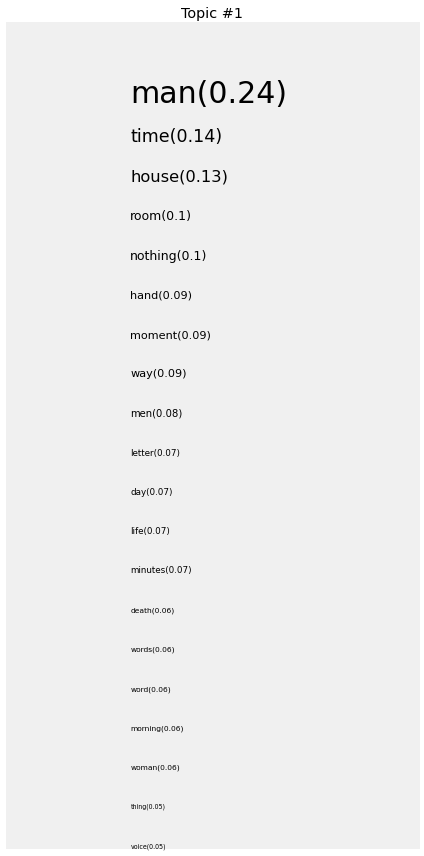

In [74]:
# Visualizing Topic #1
nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id = lupin_nmf[1], lupin_nmf[2],20, 6, 0
topic_1_fig = viz_topic_words(nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id)
plt.savefig('topic_1_fig.pdf')

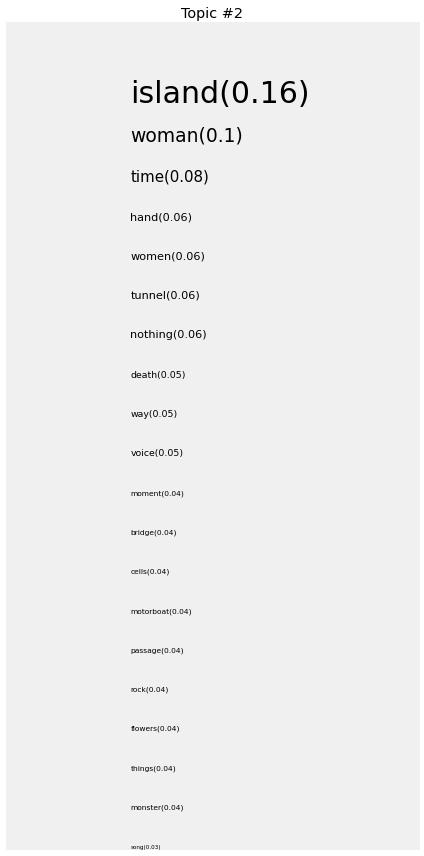

In [75]:
# Visualizing Topic #2
nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id = lupin_nmf[1], lupin_nmf[2],20, 6, 1
viz_topic_words(nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id)
plt.savefig('topic_2_fig.pdf')

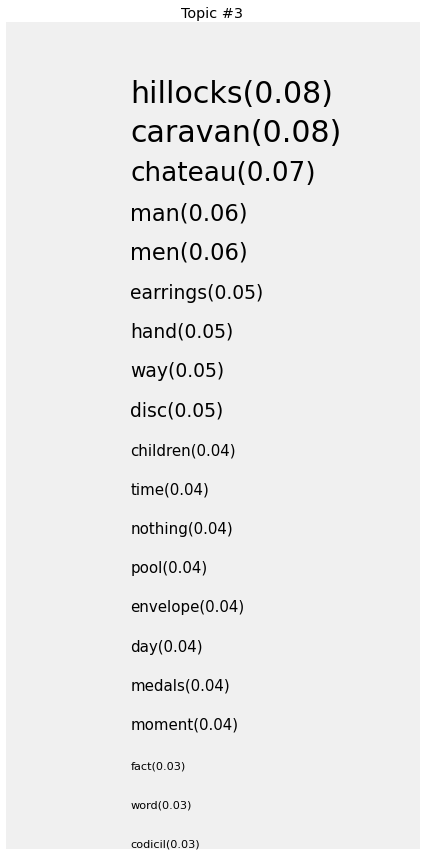

In [76]:
# Visualizing Topic #3
nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id = lupin_nmf[1], lupin_nmf[2],20, 6, 2
viz_topic_words(nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id)
plt.savefig('topic_3_fig.pdf')

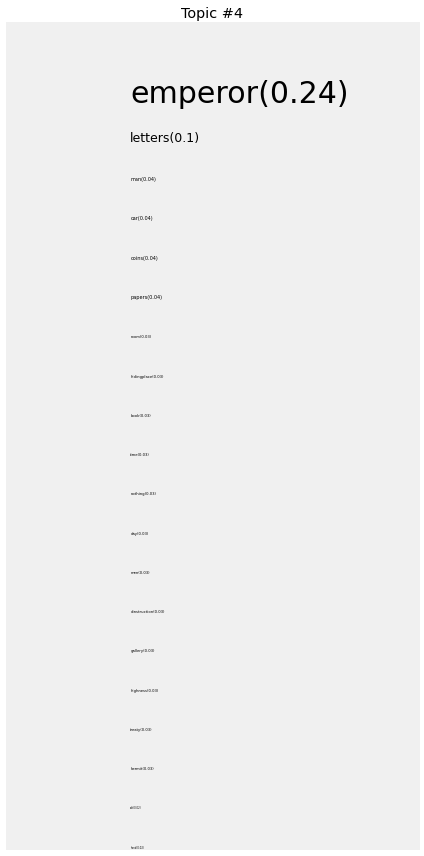

In [77]:
# Visualizing Topic #4
nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id = lupin_nmf[1], lupin_nmf[2],20, 6, 3
viz_topic_words(nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id)
plt.savefig('topic_4_fig.pdf')

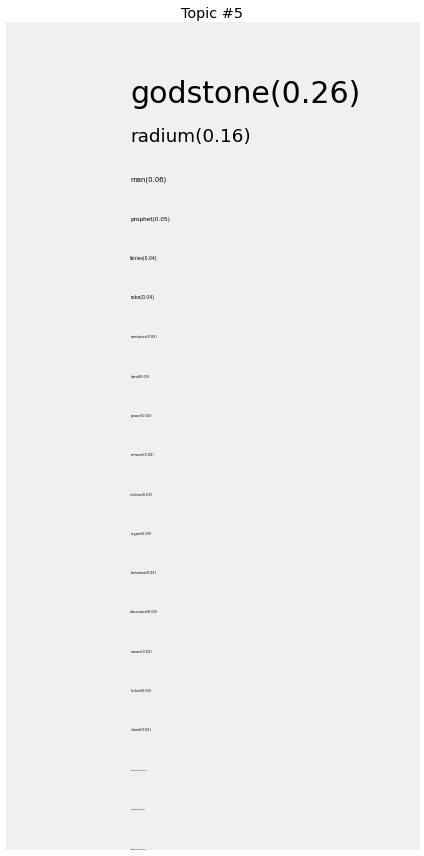

In [78]:
# Visualizing Topic #5
nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id = lupin_nmf[1], lupin_nmf[2],20, 6, 4
viz_topic_words(nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id)
plt.savefig('topic_5_fig.pdf')

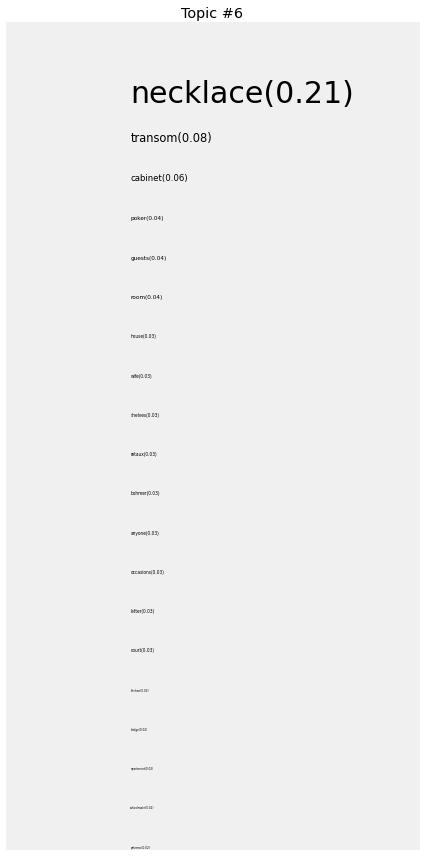

In [79]:
# Visualizing Topic #6
nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id = lupin_nmf[1], lupin_nmf[2],20, 6, 5
viz_topic_words(nmf_weights,nmf_feature_names, n_top_words, topic_num, topic_id)
plt.savefig('topic_6_fig.pdf')

## Characters, Objects, Places

In [ ]:
def text_tokenize(book):
    tokenize = word_tokenize(book)
    #my_punctuation = punctuation.replace({"'",""})
    table = str.maketrans('','', string.punctuation)
    stripped = [t.translate(table)for t in tokenize]
    tokens = [token for token in stripped if token.isalpha()]
    return tokens

In [ ]:
def tagging(tokens):
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

In [ ]:
def find_proper_nouns(tagged_tokens):
    proper_nouns = []
    i = 0
    while i < len(tagged_tokens):
        if tagged_tokens[i][1] == 'NNP':
            if tagged_tokens[i+1][1]== 'NNP':
                proper_nouns.append(tagged_tokens[i][0].lower() + " " + tagged_tokens[i+1][0].lower())
                i+=1
            else:
                proper_nouns.append(tagged_tokens[i][0])
        i+=1
    return proper_nouns

In [ ]:
def count_proper_nouns(proper_nouns, number):
    pn_counts = dict(Counter(proper_nouns).most_common(number))
    return pn_counts  

In [ ]:
def find_objects(tagged_tokens):
    objects = []
    for t in (tagged_tokens):
        if t[1]=='NN':
            objects.append(t[0])
       
    return objects

In [ ]:
def count_objects(objects, number):
    obj_counts = dict(Counter(objects).most_common(number))
    return obj_counts  

In [ ]:
#clean_books_df = pd.read_csv('data/clean_book_10.csv',index_col = [0])
clean_books = ' '.join(clean_ten.text)
type(clean_books)

In [ ]:

words = text_tokenize(clean_books)
tagged_words = tagging(words)
prop_nouns = find_proper_nouns(tagged_words)
pn_counts = count_proper_nouns(prop_nouns,1000)
pp = pprint.PrettyPrinter(indent = 2)
pp.pprint(tagged_words)
#stop = [w for w in tagged_words if tagged_words !='NN']

In [ ]:
#stop = [w for w in tagged_1 if (tagged_words[1]!= 'NN' and tagged_words[1]!='NNP')]

In [ ]:
pp.pprint(prop_nouns)

In [ ]:
pp.pprint(pn_counts)

In [ ]:
words_1 = text_tokenize(clean_text_1)
tagged_1 = tagging(words_1)
objects_1 = find_objects(tagged_1)
obj_counts_1 = count_objects(objects_1, 100)
pp = pprint.PrettyPrinter(indent = 4)

In [ ]:
pp.pprint(obj_counts_1)